In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from seaborn           import heatmap
import time
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df= pd.read_csv('winequality-red.csv')

In [3]:
df.head()
# df.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df['quality'].unique()
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


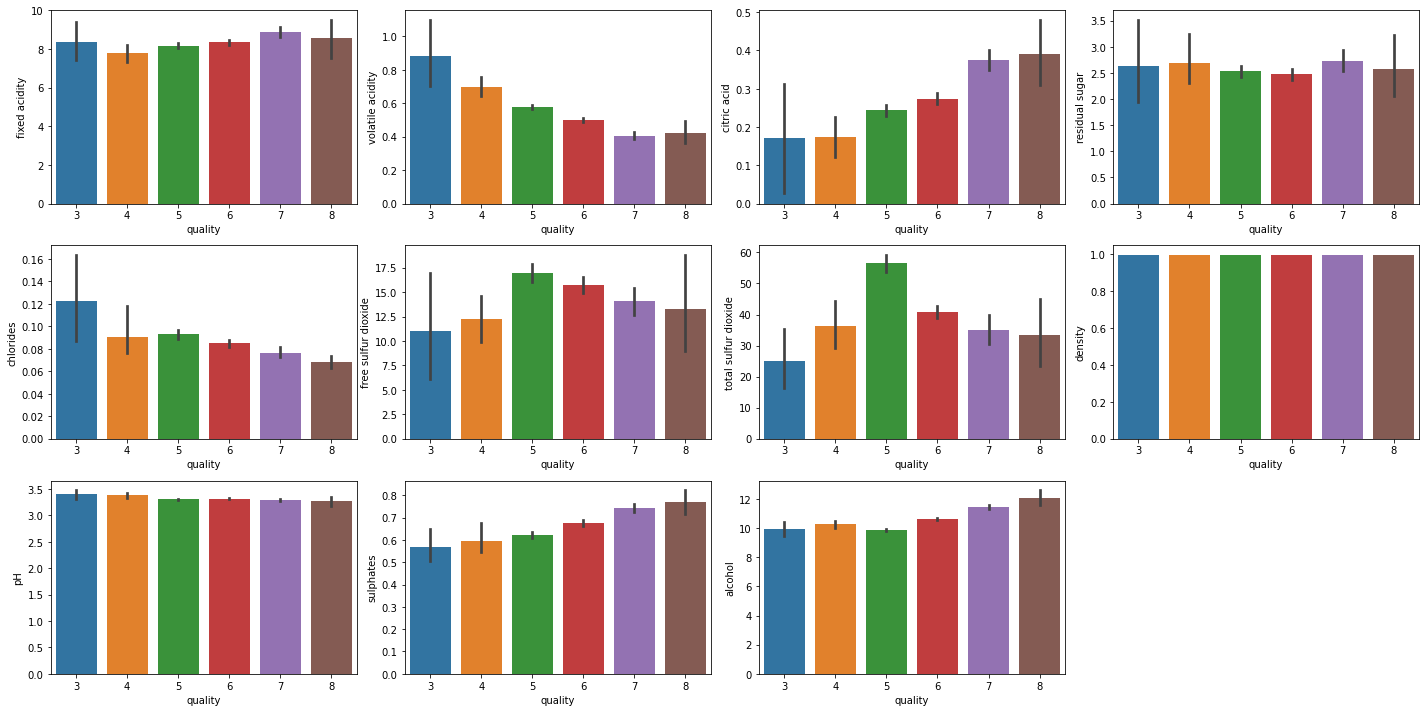

In [8]:
fig = plt.figure(figsize=(20,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=df)   
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=df)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=df)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=df)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=df)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=df)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=df)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=df)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=df)

plt.tight_layout()
plt.savefig('output.jpg',dpi=1000)

# Data binning

In [9]:
ranges= (2,6,8)
groups = ['bad','good']
df['quality'] = pd.cut(df['quality'],bins=ranges,labels=groups)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


# label encoding

In [11]:
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [12]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

# Without balancing

### Checking correalion of quality

In [13]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64

In [14]:
X = df.drop('quality',axis=1) 
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Decision tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
dt_acc=(accuracy_score(y_test,y_pred_dt))

## Random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier 
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
rf_acc= (accuracy_score(y_test,y_pred_rf))

## Comparing the accurcacy from two models

In [17]:
print(f'The accuracy score for Decision tree and Random Forest are {dt_acc}, {rf_acc}')

The accuracy score for Decision tree and Random Forest are 0.859375, 0.90625


# hyperparameter tuning for random forest

In [19]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [3, 4,5,6,7,8,9,10],
              'bootstrap': [True],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'}
Time taken in grid search:  89.23


In [20]:
# Set best parameters given by grid search 
rf.set_params(criterion = 'entropy',
                  max_features = 'log2', 
                  max_depth = 10)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2')

In [21]:
rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 102
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rf.set_params(n_estimators=i)
    rf.fit(X_train,y_train)

    oob_error = 1 - rf.oob_score_
    error_rate[i] = oob_error

In [22]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 102 to 1000 trees)')

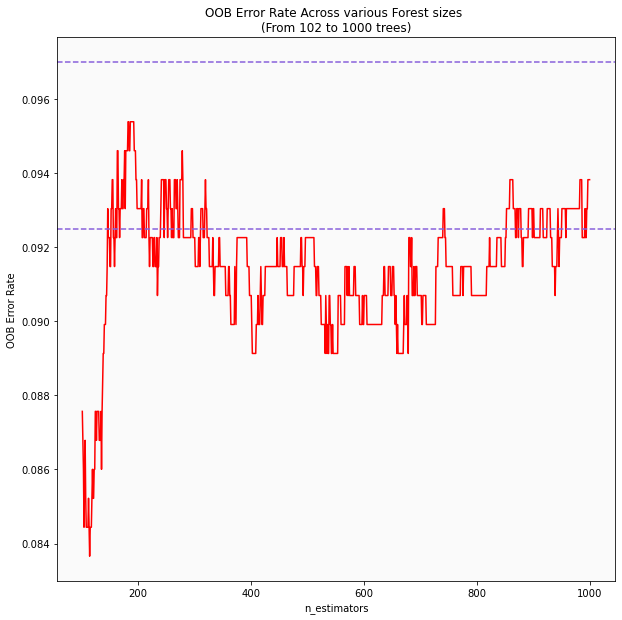

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.097, color='#875FDB',linestyle='--')
plt.axhline(0.0925, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 102 to 1000 trees)')

In [24]:
print('OOB Error rate for 800 trees is: {0:.5f}'.format(oob_series[800]))

OOB Error rate for 800 trees is: 0.09070


In [25]:
# Refine the tree via OOB Output
rf.set_params(n_estimators=800,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=800)

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=800)

In [27]:
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
rf_acc= (accuracy_score(y_test,y_pred_rf))

In [28]:
print(f'the accurac is {rf_acc}')

0.90625

In [29]:
def create_conf_mat(y_test, y_pred_rf):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len( y_pred_rf.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != y_pred_rf.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = y_pred_rf)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

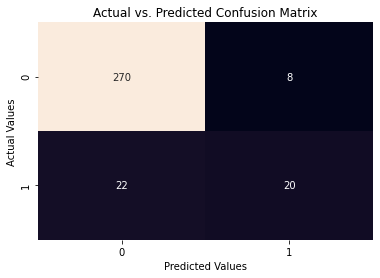

In [30]:
conf_mat = create_conf_mat(y_test, y_pred_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [31]:
from sklearn.metrics import roc_curve, auc
predictions_prob = rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, predictions_prob,pos_label=1)

In [32]:
auc_rf = auc(fpr_rf, tpr_rf)

In [33]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

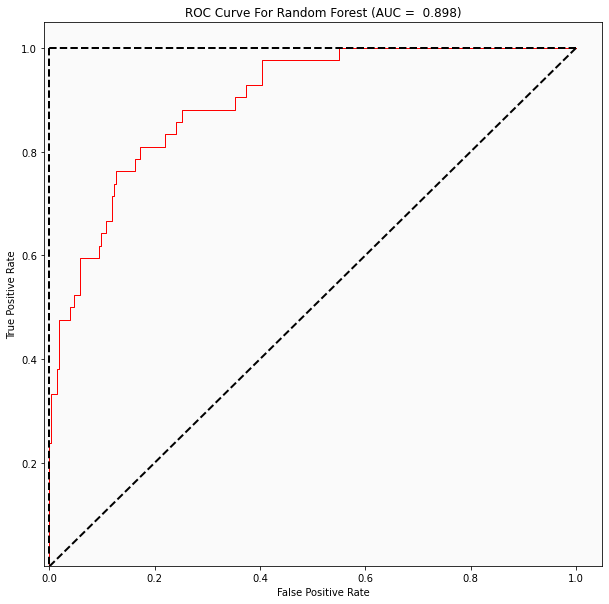

In [34]:
plot_roc_curve(fpr_rf, tpr_rf, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

In [35]:
print(classification_report(y_test,y_pred_rf))


              precision    recall  f1-score   support

           0       0.92      0.97      0.95       278
           1       0.71      0.48      0.57        42

    accuracy                           0.91       320
   macro avg       0.82      0.72      0.76       320
weighted avg       0.90      0.91      0.90       320



# balancing dataset

In [36]:
good_quality =df[df['quality']==1]
bad_quality = df[df['quality']==0]

bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:len(good_quality)]

new_df = pd.concat([good_quality,bad_quality])
new_df = new_df.sample(frac=1)
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
492,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4,1
807,8.2,0.28,0.40,2.4,0.052,4.0,10.0,0.99356,3.33,0.70,12.8,1
1413,9.9,0.57,0.25,2.0,0.104,12.0,89.0,0.99630,3.04,0.90,10.1,0
503,10.5,0.26,0.47,1.9,0.078,6.0,24.0,0.99760,3.18,1.04,10.9,1
23,8.5,0.49,0.11,2.3,0.084,9.0,67.0,0.99680,3.17,0.53,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
953,10.2,0.34,0.48,2.1,0.052,5.0,9.0,0.99458,3.20,0.69,12.1,1
1530,6.6,0.44,0.09,2.2,0.063,9.0,18.0,0.99444,3.42,0.69,11.3,0
339,12.5,0.28,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,1
1031,7.3,0.55,0.01,1.8,0.093,9.0,15.0,0.99514,3.35,0.58,11.0,1


In [37]:
new_df['quality'].value_counts()

0    217
1    217
Name: quality, dtype: int64

In [38]:
X = new_df.drop('quality',axis=1) 
y = new_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}

grid_rf = GridSearchCV(RandomForestClassifier(),param,scoring='accuracy',cv=10,)
grid_rf.fit(X_train, y_train)

print('Best parameters --> ', grid_rf.best_params_)

pred = grid_rf.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

Best parameters -->  {'n_estimators': 300}
[[56 21]
 [ 7 47]]


              precision    recall  f1-score   support

           0       0.89      0.73      0.80        77
           1       0.69      0.87      0.77        54

    accuracy                           0.79       131
   macro avg       0.79      0.80      0.79       131
weighted avg       0.81      0.79      0.79       131



0.7862595419847328
